In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.figure(dpi=200)

<Figure size 1280x960 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

In [3]:
data = pd.read_csv('SpotifyFeatures.csv')
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
print("Shape of Dataset :",data.shape)

Shape of Dataset : (232725, 18)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [11]:
data.isna().sum().sort_values(ascending=False)

track_name          1
genre               0
key                 0
time_signature      0
tempo               0
speechiness         0
mode                0
loudness            0
liveness            0
instrumentalness    0
artist_name         0
energy              0
duration_ms         0
danceability        0
acousticness        0
popularity          0
track_id            0
valence             0
dtype: int64

In [15]:
data[data['track_name'].isna()==True]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
208285,World,Elevation Worship,NaN,7BGQCe62A58Q5ZgpQFX93t,44,0.019,0.287,350027,0.446,0.0,F,0.1,-7.214,Major,0.0317,138.727,4/4,0.0387


In [12]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [13]:
data.duplicated().any()

False

In [49]:
data.nunique()

genre                   27
artist_name          14564
track_name          148614
track_id            176774
popularity             101
acousticness          4734
danceability          1295
duration_ms          70749
energy                2517
instrumentalness      5400
key                     12
liveness              1732
loudness             27923
mode                     2
speechiness           1641
tempo                78512
time_signature           5
valence               1692
count                    0
dtype: int64

In [48]:
data.groupby(['track_id']).size().sort_values(ascending=False)[:20]

track_id
6sVQNUvcVFTXvlk3ec0ngd    8
0wY9rA9fJkuESyYm9uzVK5    8
3R73Y7X53MIQZWnKloWq5i    8
6AIte2Iej1QKlaofpjCzW1    8
0UE0RhnRaEYsiYgXpyLoZc    8
3uSSjnDMmoyERaAK9KvpJR    8
2ohegz9maxzroKBu9YhcCM    7
5rAff9XfcWx7rguN3t0fkW    7
40rjypnguxfhPy4Bbv5SWc    7
3ASn2iE7F4HvA8XyRbJ4tS    7
6NueIkCzLhp4rXpNAiXDdh    7
1USFYZrDt86UdqZxuXYHUG    7
7qCZgvV98j6RjUULW1s1it    7
18oWEPapjNt32E6sCM6VLb    7
5E5HYgxGMp3BPakHGfKfIB    7
68dd9CEzAUc4zeukKzMJP5    7
7cgka1GOkbcvNqQYrs2FwE    7
6PmnGYDsruYLBNY4Rpx4t9    7
53PkA8aXiwH4ppa0V0iO7o    7
5NijSs5dAwaIybq1GaRTIe    7
dtype: int64

In [70]:
data.drop('count', axis=1, inplace=True)

In [65]:
data.drop(data[data['genre'] == 'Children\'s Music'].index, inplace=True)

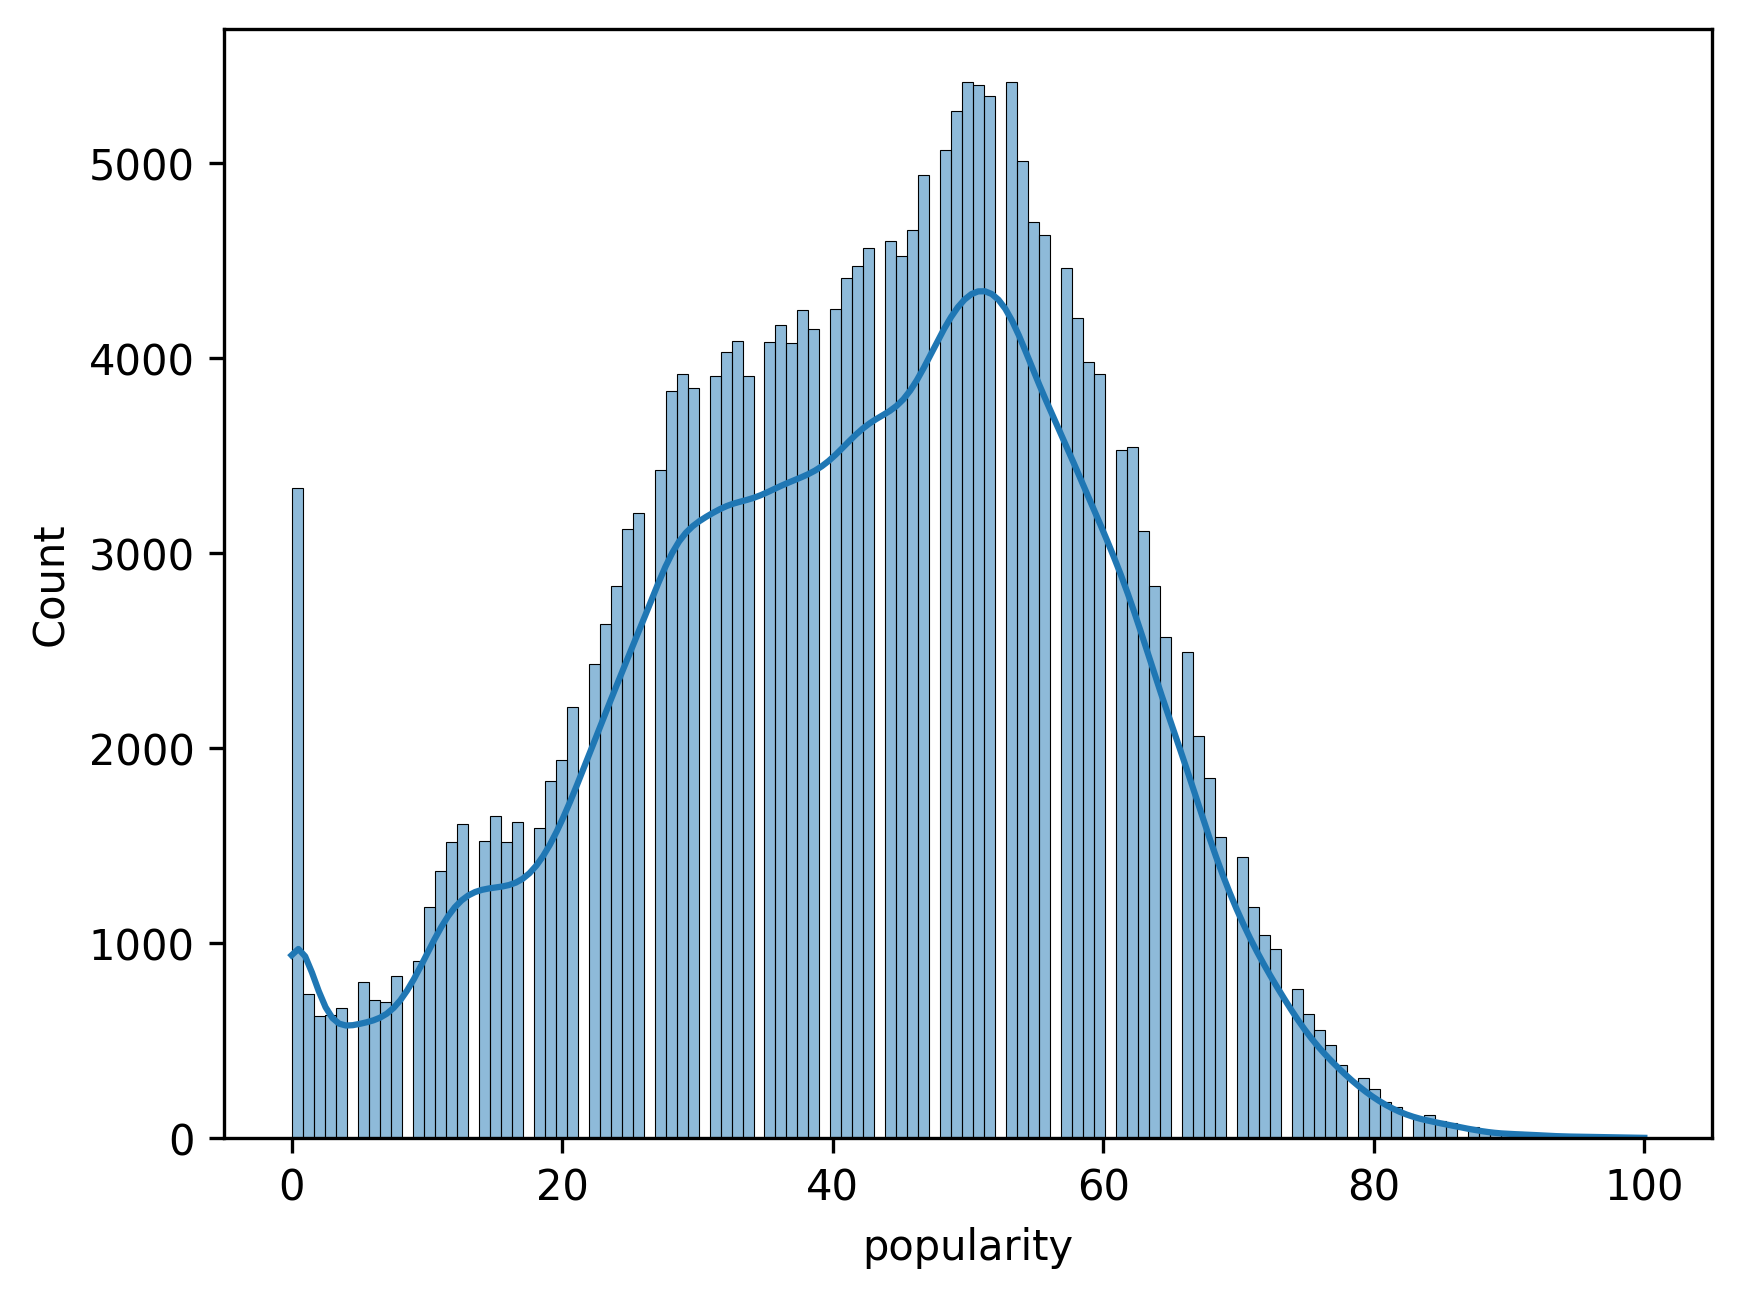

In [66]:
plt.figure(dpi=300)
sns.histplot(data=data, x='popularity',kde=True)
plt.show()

In [67]:
data['genre'].nunique()

25

In [68]:
data['genre'].value_counts()

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Name: count, dtype: int64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227203 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             227203 non-null  object 
 1   artist_name       227203 non-null  object 
 2   track_name        227202 non-null  object 
 3   track_id          227203 non-null  object 
 4   popularity        227203 non-null  int64  
 5   acousticness      227203 non-null  float64
 6   danceability      227203 non-null  float64
 7   duration_ms       227203 non-null  int64  
 8   energy            227203 non-null  float64
 9   instrumentalness  227203 non-null  float64
 10  key               227203 non-null  object 
 11  liveness          227203 non-null  float64
 12  loudness          227203 non-null  float64
 13  mode              227203 non-null  object 
 14  speechiness       227203 non-null  float64
 15  tempo             227203 non-null  float64
 16  time_signature    227203 

In [86]:
num_col = data[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']]

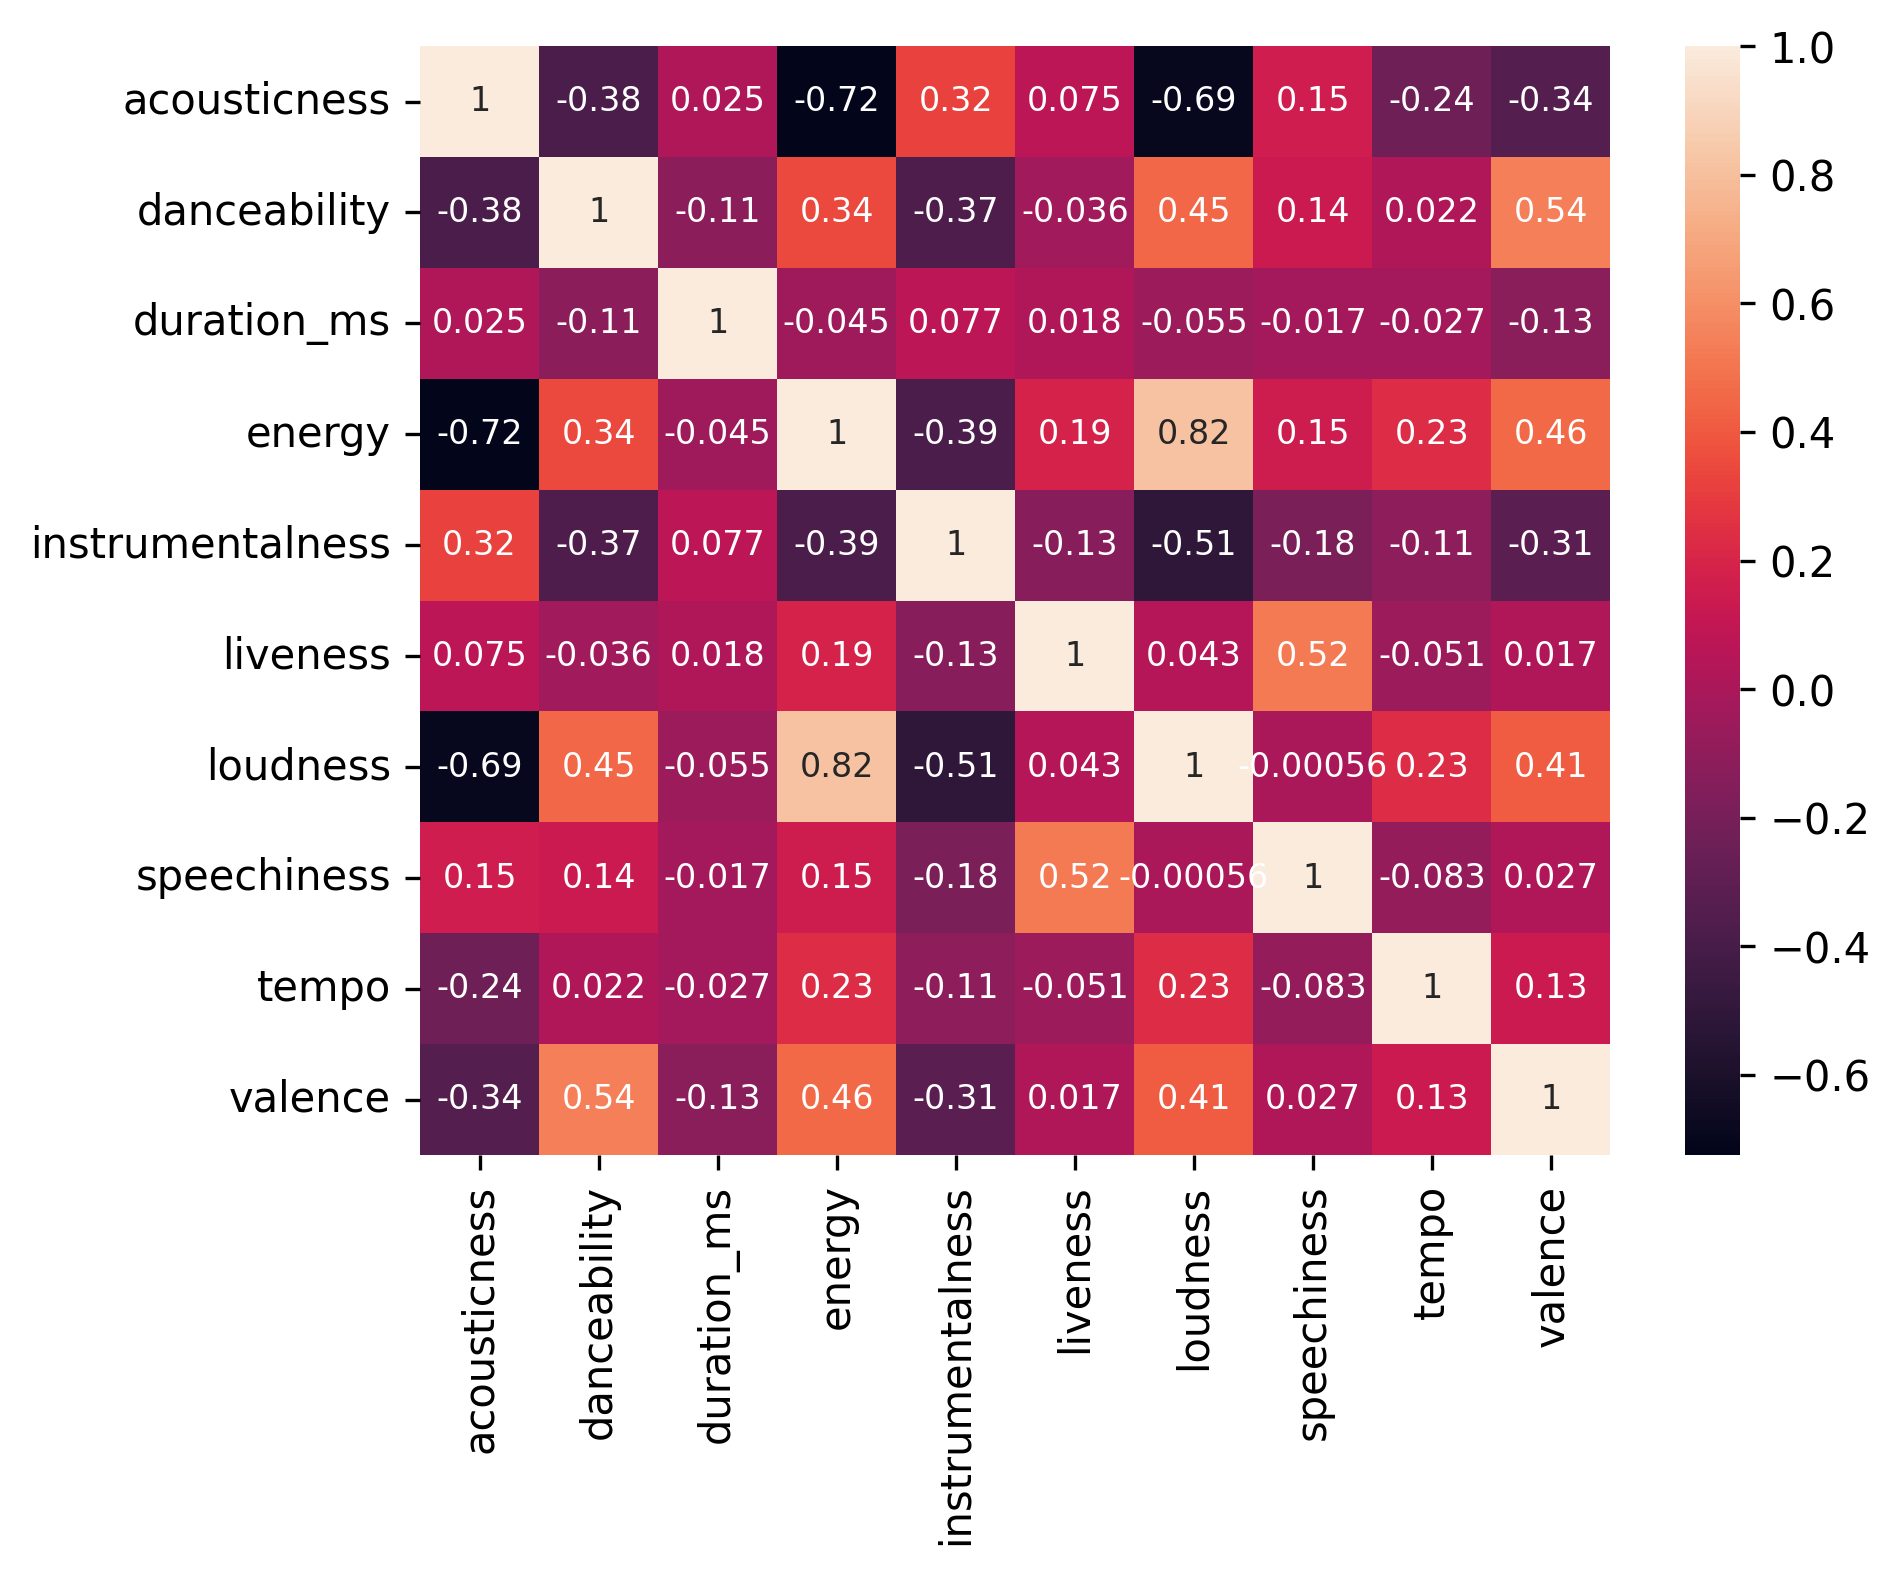

In [100]:
plt.figure(dpi=300)
ax = sns.heatmap(num_col.corr(),annot=True,annot_kws={"fontsize":8})
plt.show()

In [91]:
def plot(col):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'wspace': 0.4, 'hspace': 0.4}, dpi=400)
    sns.boxplot(data=data, x=col, ax=axes[0])
    sns.distplot(a=data[col], ax=axes[1], color='red')
    plt.show()

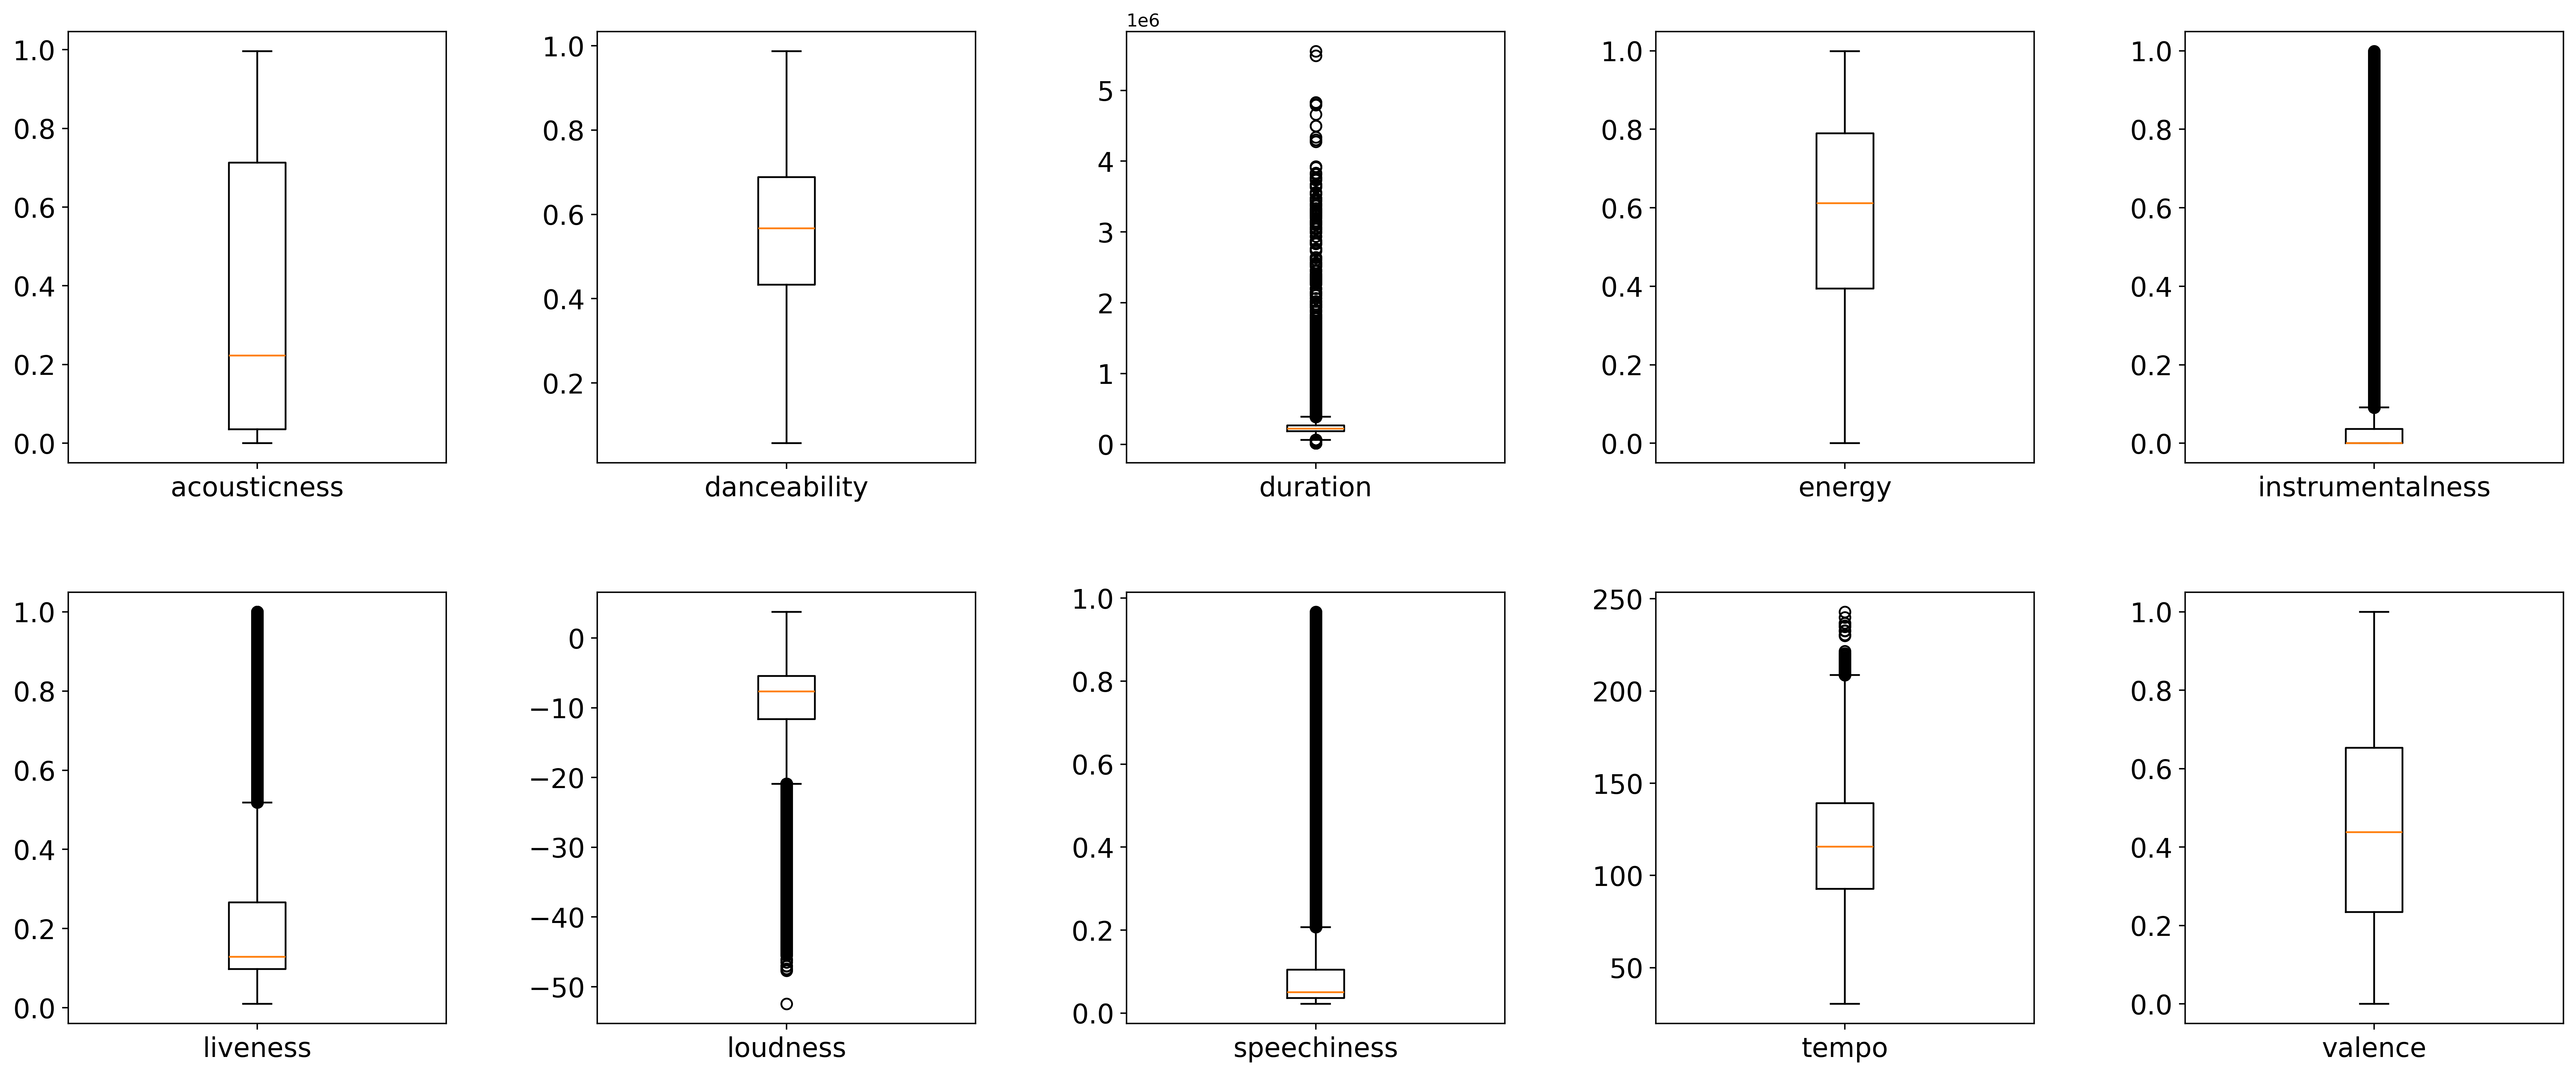

In [206]:
fig, axes = plt.subplots(2, 5, figsize=(25, 10), gridspec_kw={'wspace': 0.4, 'hspace': 0.3}, dpi=400)
cols = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
names = ['acousticness','danceability','duration','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
for i in range(2):
    for j in range(5):
        axes[i][j].boxplot(data[cols[5*i+j]])
        axes[i][j].set_xticklabels([names[5*i+j]])
        axes[i][j].tick_params(axis='x', labelsize=15)
        axes[i][j].tick_params(axis='y', labelsize=15)
plt.show()

In [220]:
data[data['duration_ms'] > 1800000].groupby('genre').size()

genre
Blues          1
Classical      7
Comedy        38
Electronic     7
Jazz           1
Movie         39
Opera          1
Reggae         1
Reggaeton      3
Soundtrack     1
World         14
dtype: int64

In [217]:
data[data['duration_ms'] > 1800000][data['genre']=='Movie']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
15,Movie,Michel Roux,Les aventures d'Arsène Lupin: 813 - Partie 6,0uWUjxM7oDPKpb3T2y3oZm,0,0.548,0.588,2447870,0.405,0.000000,G#,0.7540,-15.550,Major,0.938,83.560,3/4,0.480
96,Movie,Chorus,Koti Chennaya(Vol.1 &amp; 2),3NXlNZSmjO3DsJ3DQuyU8e,0,0.840,0.688,3435625,0.331,0.000000,F,0.0673,-8.645,Major,0.772,102.244,4/4,0.529
114,Movie,Michel Roux,Les aventures d'Arsène Lupin: 813 - Partie 5,3kQkcxkRneREJohv69y6hD,0,0.529,0.643,2359123,0.415,0.000000,F,0.5360,-15.622,Minor,0.883,101.296,3/4,0.405
369,Movie,Michel Roux,L'aiguille creuse - Partie 1,06UFQjrvxqQe6EkHxcu9BX,0,0.801,0.698,2106095,0.306,0.000000,G#,0.8350,-15.032,Major,0.857,132.123,3/4,0.544
450,Movie,Chorus,Sri Sankashta Chathurthi Vratha,3ZsulgbSF46mgpmuZtSixp,0,0.764,0.661,3475594,0.392,0.000000,D,0.0921,-9.972,Major,0.555,88.446,4/4,0.781
465,Movie,Michel Roux,Les aventures d'Arsène Lupin: Le bouchon de cr...,49KIwG3Xoap317Yxr8q7jw,0,0.545,0.638,2271375,0.409,0.000000,G#,0.3580,-17.002,Major,0.830,124.663,3/4,0.306
470,Movie,Chorus,Pedda Gedda,4GcAO7HxToJJv9f2xRK3OE,0,0.885,0.594,3631469,0.344,0.000000,E,0.0864,-9.444,Major,0.595,74.829,4/4,0.390
54276,Movie,Michel Roux,Les aventures d'Arsène Lupin: Le bouchon de cr...,4YrErknq0rkxXJ92TeRUTy,0,0.537,0.598,2271676,0.488,0.000000,G#,0.3980,-17.857,Major,0.941,68.869,3/4,0.197
54335,Movie,Michel Roux,Les aventures d'Arsène Lupin: La demeure mystè...,6rk56FELz3oCX4MBMOj2e7,0,0.773,0.670,2386267,0.643,0.000000,A,0.3250,-8.889,Minor,0.920,104.362,4/4,0.476
54339,Movie,Michel Roux,Les aventures d'Arsène Lupin: Le bouchon de cr...,6z5USjeVFgp0Ek0qOijvOG,0,0.709,0.548,2298356,0.280,0.000000,C#,0.1180,-29.174,Major,0.929,83.206,3/4,0.170


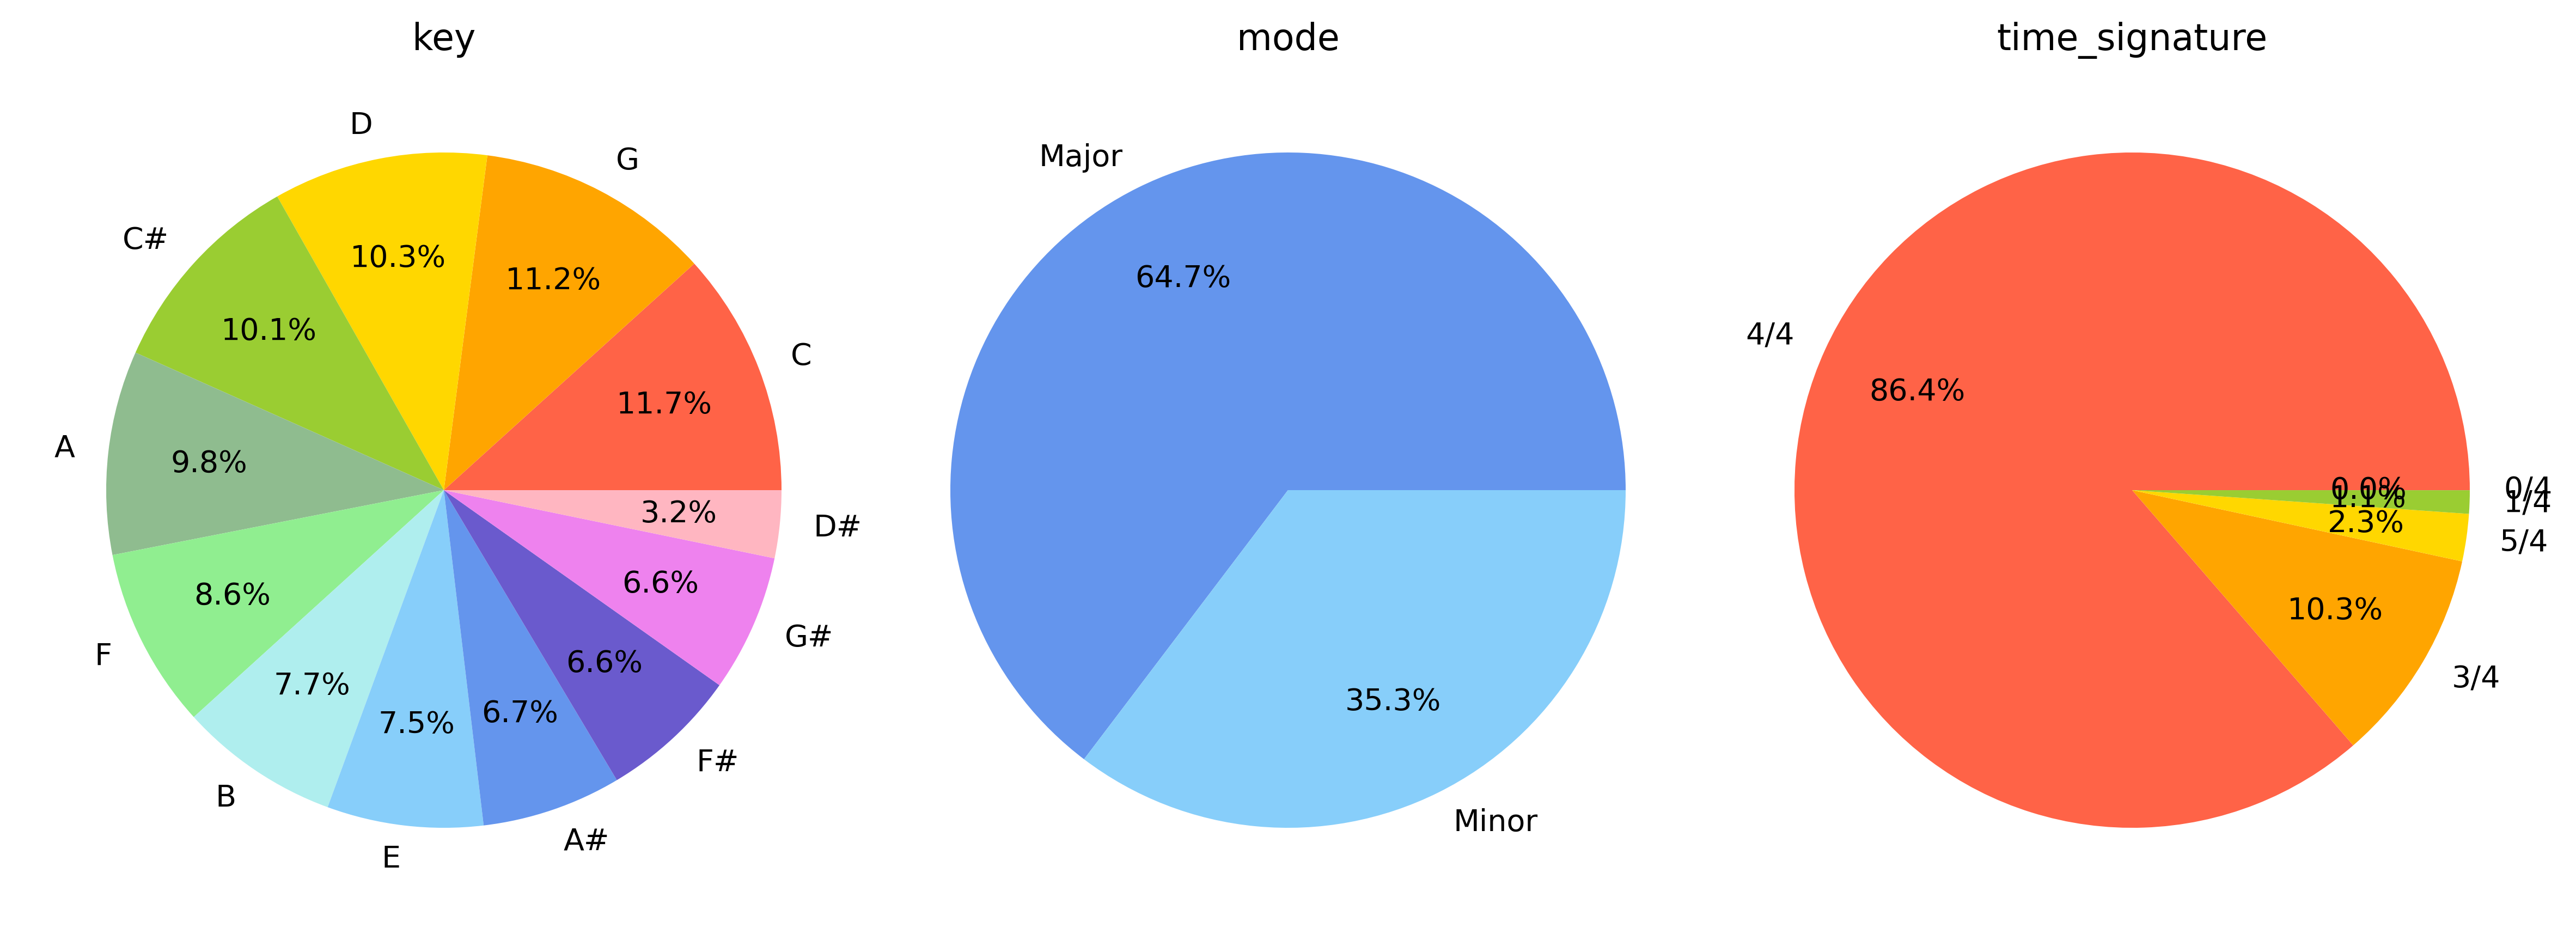

In [161]:
cols = ['key','mode','time_signature']
colours = [['tomato','orange','gold','yellowgreen','darkseagreen','lightgreen',
    'paleturquoise','lightskyblue','cornflowerblue','slateblue','violet','lightpink'],
    ['cornflowerblue','lightskyblue'],
    ['tomato','orange','gold','yellowgreen','darkseagreen']]
fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'wspace': 0, 'hspace': 0}, dpi=400)
for i in range(3):
    axes[i].pie(data[cols[i]].value_counts(),
        labels=data[cols[i]].value_counts().index,
        autopct='%3.1f%%',pctdistance=0.7,colors=colours[i])
    axes[i].set_title(cols[i])
plt.show()

In [164]:
data[data['mode']=='Major'].groupby('key').size()

key
A     13465
A#     7800
B      8003
C     21007
C#    16050
D     17775
D#     4905
E      8359
F     11227
F#     8002
G     19254
G#    11102
dtype: int64

In [165]:
data[data['mode']=='Minor'].groupby('key').size()

key
A     8702
A#    7376
B     9447
C     5582
C#    6916
D     5558
D#    2445
E     8620
F     8424
F#    7080
G     6287
G#    3817
dtype: int64

In [166]:
from scipy.stats import chi2_contingency

In [177]:
test = pd.crosstab(data['mode'],data['key'])
test

key,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
mode,,,,,,,,,,,,
Major,13465,7800,8003,21007,16050,17775,4905,8359,11227,8002,19254,11102
Minor,8702,7376,9447,5582,6916,5558,2445,8620,8424,7080,6287,3817


In [178]:
chi2_contingency(test)

Chi2ContingencyResult(statistic=13108.158810218509, pvalue=0.0, dof=11, expected_freq=array([[14337.03992905,  9815.44268342, 11286.20682825, 17197.07469092,
        14853.81237924, 15091.17844835,  4753.7891225 , 10981.57626   ,
        12709.75646888,  9754.64592457, 16519.25550719,  9649.22175764],
       [ 7829.96007095,  5360.55731658,  6163.79317175,  9391.92530908,
         8112.18762076,  8241.82155165,  2596.2108775 ,  5997.42374   ,
         6941.24353112,  5327.35407543,  9021.74449281,  5269.77824236]]))

In [233]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [234]:
data2 = data.copy()

In [236]:
list_of_keys = data2['key'].unique()
for i in range(len(list_of_keys)):
    data2.loc[data2['key'] == list_of_keys[i], 'key'] = i

In [238]:
data2.loc[data2["mode"] == 'Major', "mode"] = 1
data2.loc[data2["mode"] == 'Minor', "mode"] = 0

In [239]:
list_of_time_signatures = data2['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    data2.loc[data2['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i

In [222]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key",
    "liveness","mode", "speechiness", "tempo", "time_signature", "valence"]

In [240]:
X = data2[features]
y = data2['genre']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 104)

In [242]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 0.20525516603947977


In [244]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.05853744415835919
